# Regression Analysis (Housing Project)

## The main task is to be build a predictive model for the Boston Housing values (Median value of owner-occupied homes) using the 14 variables or pred given. Now the question is, which of the variables or predictors have a huge influence on the dependent variable (Median value of owner-occupied homes). It is obvious that the number of rooms in a house contributes to the value of the house but house true is this ascertion. Our first hypothesis is, when the number number of rooms is high, the value of the house is going to be high and vice versa.
## The second hypothesis after a careful research, the higher concentration of nitric oxide can cause low blood pressure, Nausea and Stomach Cramps, Zinc Deficiencies and other. Due to these health concerns, the higher the concentration of nitric oxides in the atmosphere, the lower the median value and vice versa.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#regression packages
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

#lasso regression
from sklearn import linear_model

#f_regression (feature selection)
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

# recursive feature selection (feature selection)
from sklearn.feature_selection import RFE

#ignore warning
import warnings
warnings.filterwarnings("ignore")

# Loading Data

In [2]:
df = pd.read_csv("data/b_housing.csv")
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# Data Preparation

In [3]:
# Identifying data types and the total number of entries
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     508 non-null    float64
 1   zn       508 non-null    float64
 2   indus    508 non-null    float64
 3   chas     508 non-null    int64  
 4   nox      508 non-null    float64
 5   rm       508 non-null    float64
 6   age      508 non-null    float64
 7   dis      508 non-null    float64
 8   rad      508 non-null    int64  
 9   tax      508 non-null    int64  
 10  ptratio  508 non-null    float64
 11  black    508 non-null    float64
 12  lstat    508 non-null    float64
 13  medv     508 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.7 KB


In [4]:
# Checking for missing values in each column or variable
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

### We have zero missing values

# Data Exploration Analysis

In [5]:
# identifying outliers using mainly minimum and maximum
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000
mean,3.599645,11.368110,11.123917,0.068898,0.554574,6.283561,88.055315,3.801993,9.531496,407.854331,18.442717,356.827283,12.652185,22.534252
std,8.587406,23.276516,6.849870,0.253530,0.115665,0.701438,441.531284,2.104464,8.694746,168.314766,2.170287,91.147283,7.126976,9.178975
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082155,0.000000,5.190000,0.000000,0.449000,5.886500,45.075000,2.100525,4.000000,279.000000,17.225000,375.472500,6.990000,17.075000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.205000,77.150000,3.215700,5.000000,330.000000,19.000000,391.475000,11.395000,21.200000
75%,3.674808,12.500000,18.100000,0.000000,0.624000,6.620500,94.025000,5.214600,24.000000,666.000000,20.200000,396.215000,16.945000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,10000.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### We have an outlier in variable Age which is 1000. As we know, no one ages to a 1000. So we will fix it

In [6]:
# finding the mean
df['age'].mean()

88.05531496062996

In [7]:
# fixing outliers by replacing the outlier with the mean
df = df.replace({'age': 10000}, {'age': 88})
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000
mean,3.599645,11.368110,11.123917,0.068898,0.554574,6.283561,68.543504,3.801993,9.531496,407.854331,18.442717,356.827283,12.652185,22.534252
std,8.587406,23.276516,6.849870,0.253530,0.115665,0.701438,28.072114,2.104464,8.694746,168.314766,2.170287,91.147283,7.126976,9.178975
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082155,0.000000,5.190000,0.000000,0.449000,5.886500,45.075000,2.100525,4.000000,279.000000,17.225000,375.472500,6.990000,17.075000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.205000,77.150000,3.215700,5.000000,330.000000,19.000000,391.475000,11.395000,21.200000
75%,3.674808,12.500000,18.100000,0.000000,0.624000,6.620500,93.925000,5.214600,24.000000,666.000000,20.200000,396.215000,16.945000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


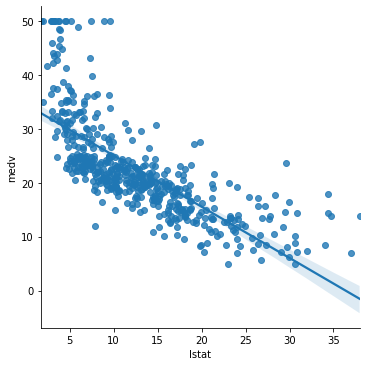

In [8]:
# finding the relationship between the response medv and Istat
sns.lmplot('lstat', 'medv', df)

### medv has a negative relationship with Istat. As Istat increases, medv will decrease and vice versa.

<AxesSubplot:xlabel='rm', ylabel='medv'>

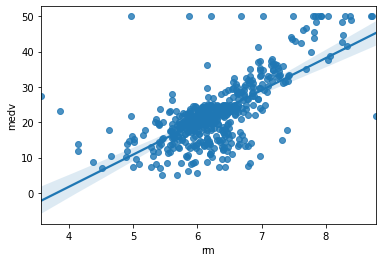

In [9]:
# finding the relationship between the response medv and rm
sns.regplot('rm', 'medv', df)

### medv has a positive relationship with rm. As Istat increases, medv will increase and vice versa.

# Correlation Analysis

In [10]:
# correlation
df.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.200481,0.407036,-0.055425,0.421202,-0.218482,0.353330,-0.380372,0.625806,0.583121,0.290985,-0.385487,0.455520,-0.388239
zn,-0.200481,1.000000,-0.533679,-0.042743,-0.516581,0.311822,-0.570019,0.663647,-0.311879,-0.314466,-0.390229,0.175539,-0.412998,0.360450
indus,0.407036,-0.533679,1.000000,0.063412,0.763702,-0.390656,0.645509,-0.708303,0.595524,0.721048,0.384190,-0.357489,0.603587,-0.483582
chas,-0.055425,-0.042743,0.063412,1.000000,0.091461,0.091627,0.086875,-0.099923,-0.006802,-0.034939,-0.119351,0.048306,-0.053888,0.175191
nox,0.421202,-0.516581,0.763702,0.091461,1.000000,-0.301651,0.732217,-0.768934,0.611573,0.668095,0.189634,-0.380307,0.590829,-0.427302
rm,-0.218482,0.311822,-0.390656,0.091627,-0.301651,1.000000,-0.239483,0.203620,-0.208872,-0.290887,-0.351530,0.127333,-0.613577,0.695090
age,0.353330,-0.570019,0.645509,0.086875,0.732217,-0.239483,1.000000,-0.748554,0.456705,0.507150,0.262227,-0.274036,0.600756,-0.376694
dis,-0.380372,0.663647,-0.708303,-0.099923,-0.768934,0.203620,-0.748554,1.000000,-0.495363,-0.535246,-0.236065,0.292412,-0.496410,0.249714
rad,0.625806,-0.311879,0.595524,-0.006802,0.611573,-0.208872,0.456705,-0.495363,1.000000,0.910330,0.465517,-0.444893,0.488477,-0.381502
tax,0.583121,-0.314466,0.721048,-0.034939,0.668095,-0.290887,0.507150,-0.535246,0.910330,1.000000,0.461915,-0.442329,0.543707,-0.468318


<AxesSubplot:>

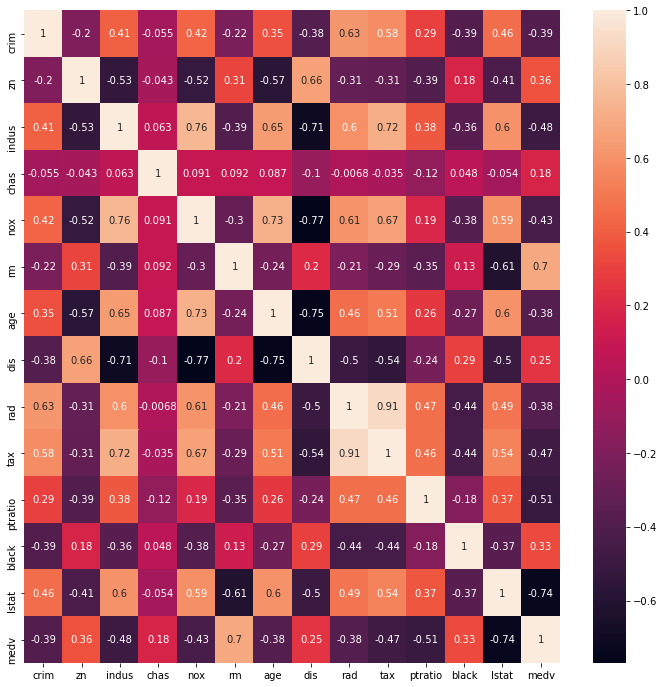

In [11]:
# correlation heatmap
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)

### Variables that are highly correlated with the response variable are number of rooms (rm), % lower status of the population (lstat) and pupil-teacher ratio by town (ptratio).
### % lower status of the population (lstat) is highly correlated with number of rooms (rm), age and proportion of non-retail business acres per town (indus). We have tax highly correlated with proportion of non-retail business acres per town (indus), index of accessibility to radial highways (rad) and nitric oxides concentration (nox). Weighted distances to five Boston employment centres (dis) is highly correlated with proportion of residential land zoned for lots over 25,000 sq.ft. (zn), proportion of non-retail business acres per town (indus) and nitric oxides concentration (nox).

In [14]:
### c. checking for p-value (TESTING FOR STATISTICAL SIGNIFICANCE OF INDEPENDENT VARIABLES)
import scipy.stats as stats
cl_corr = pd.DataFrame() # Correlation matrix
cl_p = pd.DataFrame() # Matrix of p-values
for x in df.columns:   # assuming cl as your dataframe name
   for y in df.columns:
      corr = stats.pearsonr(df[x], df[y])
      cl_corr.loc[x,y] = corr[0]
      cl_p.loc[x,y] = corr[1]

cl_p['medv']

crim       1.010349e-19
zn         4.956579e-17
indus      3.922262e-31
chas       7.198700e-05
nox        5.792642e-24
rm         1.541078e-74
age        1.425244e-18
dis        1.163231e-08
rad        4.795118e-19
tax        4.694185e-29
ptratio    2.399238e-34
black      1.181398e-14
lstat      2.309440e-88
medv       0.000000e+00
Name: medv, dtype: float64

### All variables are statistically significant with p-values less than 0.05.

# Model Building

In [15]:
#assigning columns to X and Y variables
y = df ['medv']
X = df.drop(['medv'], axis =1)

# Using train_test_split technique for predictive analysis.

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 100)


# Building a multiple regression model for all predictors using scikit-learn

In [17]:
# build a multiple regression model for all predictors using scikit-learn

model1 = lm.LinearRegression()
model1.fit(X_train, y_train)   
model1_y = model1.predict(X_test)
print('Coefficients: ', model1.coef_)
print("y-intercept ", model1.intercept_)

Coefficients:  [-1.08266368e-01  4.49464427e-02  4.62396750e-03  2.51877748e+00
 -1.34160225e+01  3.72405186e+00  8.81383620e-04 -1.39614814e+00
  3.68325102e-01 -1.58705188e-02 -8.88315175e-01  1.07902864e-02
 -5.48224974e-01]
y-intercept  33.96735729164372


In [19]:
# Printing Coefficients
coef = ["%.3f" % i for i in model1.coef_]
Xcolumns = [ i for i in X.columns ]
list(zip(Xcolumns, coef))

[('crim', '-0.108'),
 ('zn', '0.045'),
 ('indus', '0.005'),
 ('chas', '2.519'),
 ('nox', '-13.416'),
 ('rm', '3.724'),
 ('age', '0.001'),
 ('dis', '-1.396'),
 ('rad', '0.368'),
 ('tax', '-0.016'),
 ('ptratio', '-0.888'),
 ('black', '0.011'),
 ('lstat', '-0.548')]

### The coefficients of the variables represents the change in the mean of the media value of owner-occupied homes for each change in each variables, we a change in the median value by the coefficient value. For instance, a change in the median value for each increase in average number of rooms per dwelling, holding the other variables fixed, on average, we expect the median value to increase by 3.81. Also, a change in the median value for each increase in nitric oxides concentration, holding the other variables fixed, on average, we expect the median value to decrease by -17.765.

In [20]:
# obtaining model accuracy
print("mean square error: ", mean_squared_error(y_test, model1_y))
print("variance or r-squared: ", explained_variance_score(y_test, model1_y))

mean square error:  19.3285995927794
variance or r-squared:  0.7533258297637573


### About 75% of the sample variation can be explained by using the multiple regression model. The closer it is to 100% the better the model.

In [21]:
# Printing predicted y
model1_y

array([19.23709721, 33.52686515, 31.84799127, 18.37477183, 32.92241283,
       25.27619094, 29.54389339, 22.90861884,  0.95289317, 13.83383266,
        6.7557614 , 10.30529305, 21.17312746, 14.69176723, 16.50913358,
       22.76876554, 40.63145862, 26.13020814, 27.18488148, 15.85820122,
       36.82397553, 20.35372934, 22.53474326, 12.61555412, 19.90361932,
       22.98467425, 18.53914888, 16.195624  , 22.96262063, 23.04823745,
       15.64871432,  6.15244677, 19.21583531, 32.59172254, 40.85862843,
       29.08356334, 21.58020702, 12.80629569, 18.75427812, 23.45403028,
       23.06814639, 31.76349542, 16.17452281, 25.48757269, 10.45579007,
       23.52584832, 16.84207663, 21.49884132, 20.28226885, 18.72262526,
       27.93333326, 20.21897209, 24.13111296, 17.66512687, 20.48435367,
       26.24534384, 23.65571446, 34.27002182, 20.05712849, 20.73089908,
       11.97386591, 30.86481176, 22.76745866, 28.38617702, 20.05877609,
       18.19337194, 41.30769683, 28.71851853, 32.19759285, 20.60

In [23]:
# printing the y test
y_test.head(5)

497    18.3
231    31.7
188    29.8
31     14.5
157    41.3
Name: medv, dtype: float64

Text(0, 0.5, 'medv')

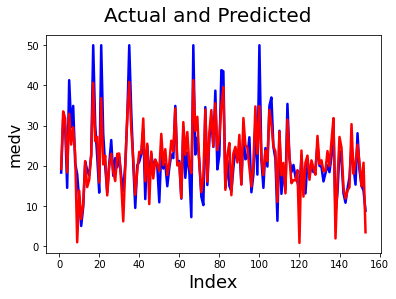

In [24]:
# Visualizing actual y and predicted y.
c = [i for i in range(1, 154, 1)]
fig = plt.figure()
plt.plot(c, y_test, color = "blue", linewidth = 2.5, linestyle = "-" )
plt.plot(c, model1_y, color = "red", linewidth = 2.5, linestyle = "-" )
fig.suptitle('Actual and Predicted', fontsize = 20)
plt.xlabel('Index', fontsize = 18)
plt.ylabel('medv', fontsize = 16)

### Red line is the predicted and the blue represent y test show how close the predicted result is to the actual results.

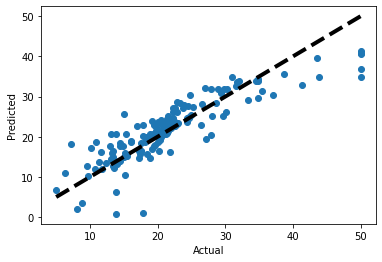

In [25]:
# showing the best fit for y test and predicted
plt.subplots()
plt.scatter(y_test, model1_y )
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

# Using Random Forest Regression

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

regr = RandomForestRegressor(n_estimators=30, random_state=0)
regr.fit(X_train, y_train)
y_predicted = regr.predict(X_test)


# Checking for Accuracy

In [27]:
print("mean square error: ", mean_squared_error(y_test, y_predicted))
print("variance or r-squared: ", explained_variance_score(y_test, y_predicted))

mean square error:  9.851185185185182
variance or r-squared:  0.8762847826894701


# Identifying important features

In [28]:

sorted(zip(regr.feature_importances_, X_train.columns))

[(0.00038912695993407976, 'chas'),
 (0.0009373196336505509, 'zn'),
 (0.005663772866987698, 'indus'),
 (0.006081233713437578, 'rad'),
 (0.008377437990193918, 'black'),
 (0.01314722102237543, 'age'),
 (0.015245044047144054, 'ptratio'),
 (0.018444597969965427, 'nox'),
 (0.019704351100021566, 'tax'),
 (0.045895170533928754, 'crim'),
 (0.07034956851666095, 'dis'),
 (0.373975537526024, 'lstat'),
 (0.42178961811967597, 'rm')]

# Identifying important features in a table

In [29]:
feature_importances = pd.DataFrame(regr.feature_importances_, index = X_train.columns, columns=['importance']).sort_values('importance', ascending=False)

feature_importances

,importance
rm,0.421790
lstat,0.373976
dis,0.070350
crim,0.045895
tax,0.019704
nox,0.018445
ptratio,0.015245
age,0.013147
black,0.008377
rad,0.006081


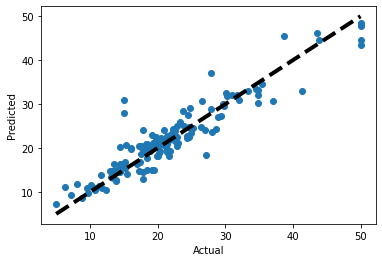

In [30]:
plt.subplots()
plt.scatter(y_test, y_predicted)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

Text(0, 0.5, 'medv')

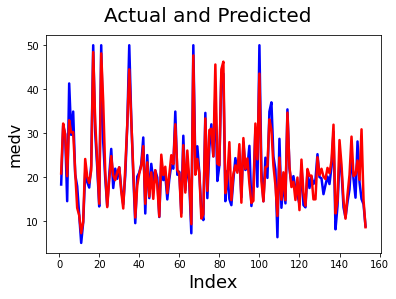

In [31]:
# Visualizing actual y and predicted y.
c = [i for i in range(1, 154, 1)]
fig = plt.figure()
plt.plot(c, y_test, color = "blue", linewidth = 2.5, linestyle = "-" )
plt.plot(c, y_predicted, color = "red", linewidth = 2.5, linestyle = "-" )
fig.suptitle('Actual and Predicted', fontsize = 20)
plt.xlabel('Index', fontsize = 18)
plt.ylabel('medv', fontsize = 16)

### Red line is the predicted and the blue represent y test show how close the predicted result is to the actual results.

# Model Deployment

In [36]:
# Load Score data
score_data = pd.read_csv("data/b_housing_scoringdataset.csv")
score_data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [37]:
# Checking for missing value
score_data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
dtype: int64

# Using Random Forest Regressor for model deployment

In [38]:
#assigning columns to X and Y variables
X = df.drop(['medv'], axis =1)

In [39]:
# predicting Score_data
score_predicted = regr.predict(X)

In [43]:
# making a dataframe for score_predicted.
score_predicted = pd.DataFrame(score_predicted, columns=['predicted medv'])
score_predicted

,predicted medv
0,25.110000
1,21.870000
2,35.286667
3,33.033333
4,35.936667
...,...
503,25.090000
504,24.206667
505,16.496667
506,22.533333


In [45]:
# Adding predicted medv to the score data
predicted = score_predicted.join(score_data)
predicted.head()

,predicted medv,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,25.110000,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,21.870000,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,35.286667,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,33.033333,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,35.936667,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


# Confirming Hypothesis

## Our first hypothesis is, when the number of rooms dwelling is high, the value of the house or the Median value is going to be high and vice versa. From the regression analysis, our model built showed a high influence or relationship between the predictor(number of rooms dwelling and the response median value. The hypothesis testing results begins with the correlation between number of room dwelling and the median value, which showed a positive relationship with 0.7. The coefficient of the predictor showed a positive slope indicating an increase in the number of rooms resulting to a high or increase in the median value. Testing the statistical significance of the predictor (number of rooms dwelling), the p-value(0.00) is less than the level of significance 0.05, making the predictor(number of rooms dwelling) statistically significant. Therefore, our first hypothesis still holds that, when the number of rooms is high or increases, the median value or the value Boston Housing increases or is high and the opposite is same.
## The second hypothesis, the higher the concentration of nitric oxides in the atmosphere, the lower the median value and vice versa. Our testing results showed a negative but high correlation or relationship between nitric oxides as the predictor and the response median value of owner-occupied homes. The coefficient or the slope of the predictor, nitric oxides showed a negative slope. Thus as the concentration of nitric oxides increases, the median value of Boston Housing decreases which affirms our hypothesis. Now, we test for the statistical significance of nitric oxides concentration. The p-value(0.000) is less than the level of significance 0.05. That is nitric oxides concentration is statistically significant in determining predictions.

# Managerial Implication

## The best model has R-Square 0.88 and which is higher than the other model built. The predicted variables all have p-values less than the level of significance 0.05 making  all variables statistically significant. This result affirms the overall model statistically significant. The most important X variables as it could be seen through the correlation analysis done are the number of rooms per dwelling, % lower status of the population, proportion of non-retail business acres per town, per capita crime rate by town and nitric oxides concentration (parts per 10 million). These five X variables are very important in predicting the Boston housing prices. These X variables are important because, customers for instance look out for towns or neighborhoods that have low crime rate (Safety and security is a must for home owners), no pollution in the atmosphere (every home owner wants to live healthy), houses with enough rooms (Big enough to accommodate the home owners' family), low population in the area (Less noisy area). All these X variables increases or decrease the willingness of a customer or client to pay high for a house. City planners must take keen interest in making sure these X variables are taken into consideration.